####  <span style="color:#5D8BF4"> Irena Vent </span>

# <span style="color:#051367"> Machine Learning</span>

<span style="color:#051367"> **Dataset**: Airbnb </span>

<span style="color:#051367"> **Objetivo**: Predecir el precio de un airbnb situado Madrid</span>


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

<span style="color:#5D8BF4">Cargamos nuestro dataset con el objetivo de: </span> 
 
- Extraer todas las muestras referentes Madird (Spain)>
- Comprobar si existen variables que puedan ser descartadas previo al análisis exploratior de datos, por ejemplo: ids, urls, etc.

In [3]:
prueba = pd.read_csv('./data/airbnb-listings.csv', sep=';', decimal='.')

#pd.set_option('display.max_columns', None)
#prueba.head()

In [4]:
prueba.shape

(14780, 89)

In [5]:
# eliminamos las muestras que contienen NaN en las columnas indicadas
prueba = prueba.dropna(subset=['Country', 'City'])

# filtramos por Spian y Madrid
prueba = prueba.loc[prueba['Country'] == 'Spain']
prueba = prueba[prueba["City"].str.contains("Madrid")]

print(f'Dimensión dataframe --> {prueba.shape}')
print(f'Valores únicos en Country --> {prueba["Country"].unique()}')
print(f'Valores únicos en City --> {prueba["City"].unique()}')

Dimensión dataframe --> (13234, 89)
Valores únicos en Country --> ['Spain']
Valores únicos en City --> ['Madrid' 'Delicias-Madrid' 'Madrid, Comunidad de Madrid, ES'
 'Comunidad de Madrid' 'Centro, Madrid' 'Chueca, Madrid'
 'Madrid, Comunidad de Madrid, ESPANA' 'Madrid, Vallecas (Fontarrón)'
 'Aravaca (Madrid)']


In [6]:
#prueba.columns

In [7]:
# consideramos las siguientes columnas irrelevantes, las eliminamos antes de la división train-test

prueba = prueba.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
                      'Experiences Offered', 'Neighborhood Overview','Zipcode' , 'Notes', 'Transit', 'Access', 
                      'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
                      'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About','Amenities', 
                      'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood','Host Listings Count', 
                      'Host Total Listings Count', 'Host Verifications', 'Street', 'City', 'State', 'Market',
                      'Smart Location', 'Country Code', 'Country', 'First Review', 'Last Review', 'Calendar Updated', 
                      'Calendar last Scraped', 'License', 'Jurisdiction Names', 'Calculated host listings count',
                      'Geolocation', 'Features'], axis = 1)

In [8]:
prueba.shape

(13234, 40)

<span style="color:#5D8BF4"> **Divsión del dataset en train y test** para el desarrollo de análisis exploratorio de datos. Que se realizará únicamente sobre el subconjunto de train. Posteriormente, en la validación del modelo elegido, las decisiones tomadas sobre train se aplicaran al subconjunto de test. </span> 

In [9]:
from sklearn.model_selection import train_test_split

#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(prueba, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10587, 40)
Dimensiones del dataset de test: (2647, 40)


<span style="color:#5D8BF4"> **Análisis exploratior de los datos** </span> 

In [10]:
pd.set_option('display.max_columns', None)
prueba.head()

,Host Response Time,Host Response Rate,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,within an hour,100.0,NaN,NaN,Embajadores,Centro,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,NaN,13,24,42,66,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11
1,within an hour,100.0,NaN,NaN,Embajadores,Centro,40.408316,-3.705006,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,NaN,NaN,250.0,15.0,2,25,1,1125,NaN,15,42,72,347,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88
2,within an hour,100.0,NaN,NaN,Embajadores,Centro,40.413722,-3.706823,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,NaN,77.0,NaN,NaN,NaN,25.0,1,0,1,1125,NaN,7,34,64,155,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18
3,within a few hours,100.0,NaN,Embajadores,Embajadores,Centro,40.411263,-3.697305,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,NaN,50.0,300.0,740.0,200.0,25.0,1,20,7,1125,NaN,7,7,7,191,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19
4,within an hour,100.0,NaN,Embajadores,Embajadores,Centro,40.412556,-3.701155,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,NaN,95.0,590.0,NaN,200.0,60.0,4,0,4,1125,NaN,3,5,12,237,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39


In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9265.0,94.824825,15.290864,0.000000,100.000000,100.000000,100.000000,100.000000
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,10587.0,40.420493,0.020219,40.331888,40.410029,40.418698,40.427854,40.514247
Longitude,10587.0,-3.696979,0.023509,-3.835498,-3.707712,-3.701477,-3.693722,-3.573613
Accommodates,10587.0,3.186738,1.990195,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10545.0,1.251304,0.591339,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10570.0,1.298392,0.825536,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10547.0,1.981891,1.497249,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,409.0,355.371638,476.969790,0.000000,0.000000,108.000000,603.000000,2691.000000
Price,10578.0,65.983456,56.389137,9.000000,30.000000,52.000000,80.000000,875.000000


In [12]:
#df_train.isnull().any()
df_train.isnull().sum()

Host Response Time               1322
Host Response Rate               1322
Host Acceptance Rate            10587
Neighbourhood                    3561
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          42
Bedrooms                           17
Beds                               40
Bed Type                            0
Square Feet                     10178
Price                               9
Weekly Price                     7917
Monthly Price                    7944
Security Deposit                 6080
Cleaning Fee                     4338
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Has Availability                10587
Availability

In [13]:
df_train.dtypes

Host Response Time               object
Host Response Rate              float64
Host Acceptance Rate            float64
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Square Feet                     float64
Price                           float64
Weekly Price                    float64
Monthly Price                   float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64


<span style="color:#5D8BF4">**Primeras evidencias**</span>

- Existen varibles, como son: Host Response Time, Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, Property Type, Bed Type, Amenities, y Cancellation Policy, todas ellas de tipo **object** que deben ser transformadas y/o categorizadas;
- Las variables Host Acceptance Rate y Has Availability pueden ser eliminadas al tener todas sus muestras ausentes; - La variable objetivo Price tiene 9 muestras con valores ausentes, que se eliminarán;
- La varieble Square Feet debe ser transformada a Square Meter observamos que más de 96% de sus muestras están ausentes, por lo que decidimos eliminar dicha columna;
- La varible Zipcode parece tener datos erróneos, reisar y eliminar valores ausente;
- Imputar los valores ausentes con la moda en Bed, Bedroom y Bathroom, el 75% de la muestra está dentro del rango, pues parece haber algún autlier;
- Sobre las variables Neighbourhood, Neighbourhood Cleansed y Neighbourhood Group Cleansed se puede hacer un análisis pormenorizado para tomar la decisión de cuál de las tres varaibles podemos usar para el posterior estudio y si es necesario realizar algún tipo de clustering para optimizar;
- Para las variables Weekly Price y Monthly Price analizar con un estudio de correlación y decidir si se pueden eliminar;
- Muchas de las variabbles (Accommodates, Square Feet, Weekly Price, Monthly Price, Security Deposit, Number of Reviews, etc) presentan valores dispares, por lo que sería necesario explorar los datos para ecnontrar posibles outliers;
- Todas las variables Review excepto Number of Reviews, presentan valores ausentes, la imputación según los datos, puede ser a través de las mediam. Pero sería necesario valorar la opción de eliminar alguna de dichas variables con un estudio de correlaciones;

<span style="color:#5D8BF4"> **Veamos a continuación el gráfico de correlaciones para ver si podemos eliminar algunas variables**</span>

- **Nota importante**: en este gráfico no aparecen las variables **object**, pero tomamos la decisión de comprobar las correlaciones antes de la imputación para ver si entre las variables numéricas existentes (en este punto del desarrollo) puede haber variables altamente correladas;


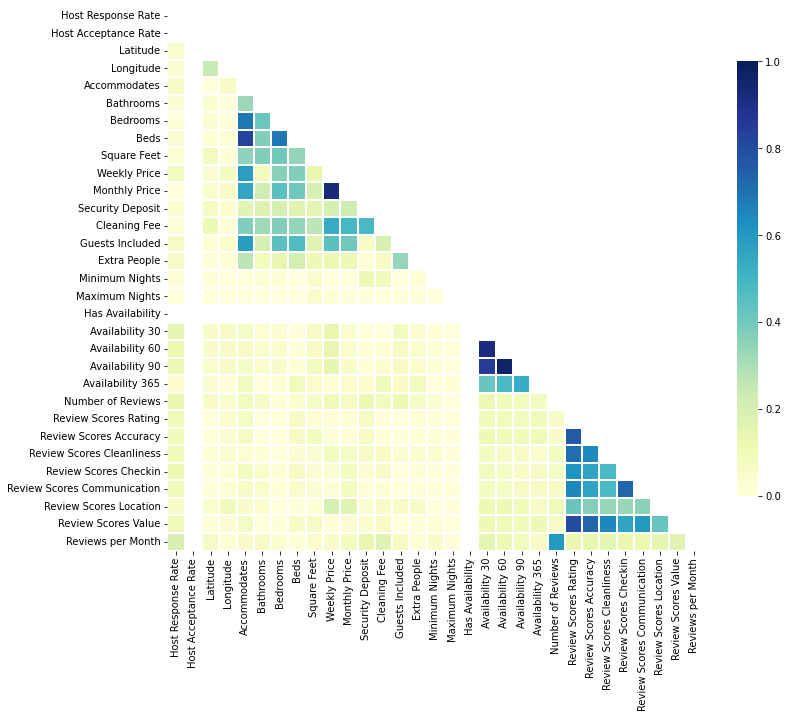

In [14]:
import seaborn as sns

corr = np.abs(df_train.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [15]:
# eliminamos las columnas con valores ausentes y alta correlación entre variables predictoras
# evitar la colinealidad
df_train = df_train.drop(['Host Acceptance Rate', 'Host Response Time', 'Has Availability', 'Square Feet', 
                          'Neighbourhood', 'Neighbourhood Cleansed', 'Weekly Price', 'Monthly Price', 
                          'Has Availability', 'Availability 30', 'Availability 60', 'Availability 365',
                          'Review Scores Accuracy', 'Review Scores Checkin','Review Scores Communication', 
                          'Reviews per Month', 'Review Scores Value'], axis = 1)

# eliminamos 9 muestras con Price NaN
df_train = df_train.dropna(subset=['Price'])

print(f'Porcentaje de muestras eliminadas: {round((10587-df_train.shape[0])/10587*100,4)} %')
print(f'Tamaño df_train: {df_train.shape}')

Porcentaje de muestras eliminadas: 0.085 %
Tamaño df_train: (10578, 24)


<span style="color:#5D8BF4"> Vamos a explorar las variables Property/Room/Bed Type y Cancellation Policy para ver su categorización.<span>

In [16]:
columns = ['Room Type', 'Bed Type', 'Cancellation Policy', 'Property Type']

for column in columns:
    print (f'{column} --> {df_train[column].unique()}')
    print (f'{column} --> {len(df_train[column].unique())}')
    print (df_train[column].value_counts())

Room Type --> ['Entire home/apt' 'Private room' 'Shared room']
Room Type --> 3
Entire home/apt    6287
Private room       4129
Shared room         162
Name: Room Type, dtype: int64
Bed Type --> ['Real Bed' 'Pull-out Sofa' 'Futon' 'Couch' 'Airbed']
Bed Type --> 5
Real Bed         10354
Pull-out Sofa      180
Futon               28
Couch               11
Airbed               5
Name: Bed Type, dtype: int64
Cancellation Policy --> ['moderate' 'flexible' 'strict' 'super_strict_60' 'super_strict_30']
Cancellation Policy --> 5
strict             3976
flexible           3402
moderate           3193
super_strict_60       5
super_strict_30       2
Name: Cancellation Policy, dtype: int64
Property Type --> ['Apartment' 'Condominium' 'Loft' 'Chalet' 'Other' 'House'
 'Bed & Breakfast' 'Guesthouse' 'Dorm' 'Boutique hotel' 'Hostel'
 'Serviced apartment' 'Townhouse' 'Guest suite' 'Earth House' 'Tent'
 'Timeshare' 'Villa' 'Casa particular' 'Camper/RV' 'Bungalow' 'Boat']
Property Type --> 22
Apartment   

<span style="color:#5D8BF4"> Tomamos las siguientes decisiones:<span>

- **Room Type** pasará a ser variable numérica con 3 valores;
- **Bed Type** pasará a ser variable numérica con 3 valores, dado que las 2 primeros grupos explican el 99% de las muestras, las tres últimas pasaran a formar un sólo grupo;
- **Cancellation Policy** pasará a ser variable numérica con 4 valores, super_strict_60 y super_strict_30 se van a agrupar en un único grupo, que representará al nuevo grupo super-strict;
- **Property Type** pasará a ser variable numérica con 7 valores, dado que los 6 primeros grupos explican más del 98% de las muestras, es decir, el resto de grupos pasaran a formar un solo grupo el de new_other;
    
<span style="color:#5D8BF4"> Aplicamos transformaciones:<span>
    
<span style="color:#5D8BF4"> **Codificación de variables**. Decidimos usar *MeanEncoder* para codificar la variable Neighbourhood Group Cleansed y Property Type. *LeableEncoder* para Room, Bed and Cancellation Policy. </span> 

In [17]:
# Unificar grupos 
df_train['Bed Type'] = df_train['Bed Type'].str.replace('Futon', 'Other')
df_train['Bed Type'] = df_train['Bed Type'].str.replace('Couch', 'Other')
df_train['Bed Type'] = df_train['Bed Type'].str.replace('Airbed', 'Other')

df_train['Cancellation Policy'] = df_train['Cancellation Policy'].str.replace('super_strict_60', 'super_strict')
df_train['Cancellation Policy'] = df_train['Cancellation Policy'].str.replace('super_strict_30', 'super_strict')

p_types = ['Chalet', 'Guesthouse', 'Dorm', 'Boutique hotel', 'Hostel', 'Serviced apartment',
          'Townhouse', 'Guest suite', 'Earth House', 'Tent', 'Timeshare', 'Villa', 'Casa particular',
          'Camper/RV', 'Bungalow', 'Boat']

for p_type in p_types:
    df_train['Property Type'] = df_train['Property Type'].str.replace(p_type, 'new_Other')

In [18]:
from sklearn.preprocessing import LabelEncoder

# Codificación de la variables Neighbourhood Cleansed
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df_train[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

df_train['Neighbourhood Group Cleansed'] = calc_smooth_mean(df_train, by='Neighbourhood Group Cleansed', on='Price', m=df_train.shape[0])
df_train['Property Type'] = calc_smooth_mean(df_train, by='Property Type', on='Price', m=df_train.shape[0])


# Codificación de variables con LabelEncoder

le_hrr = LabelEncoder()
le_hrr.fit(df_train['Host Response Rate'])
df_train['Host Response Rate'] = le_hrr.transform(df_train['Host Response Rate'])

le_room_type = LabelEncoder()
le_room_type.fit(df_train['Room Type'])
df_train['Room Type'] = le_room_type.transform(df_train['Room Type'])

le_bed_type = LabelEncoder()
le_bed_type.fit(df_train['Bed Type'])
df_train['Bed Type'] = le_bed_type.transform(df_train['Bed Type'])

le_cancell_p = LabelEncoder()
le_cancell_p.fit(df_train['Cancellation Policy'])
df_train['Cancellation Policy'] = le_cancell_p.transform(df_train['Cancellation Policy'])

<span style="color:#5D8BF4"> **Imputación de valores ausentes** </span>

- Tenemos un neumero bajo de variables a imputar por lo que decidimos tomar la decisión de imputar Bathrooms, Bedrooms y Beds con el valor meas frecuente, aun siendo valor numéricos, no categóricos, su valores puede tender a comportarse como tal. Usaremos mismo prámetros para las variebles Review;
- Las varibles Security Deposit y Cleaning Fee tienen un alto porcetaje de valores perdidos, pero consideramos que ambas variables pueden ser variables predictoras, por ello no las eliminamos. Imputamos los valores perdidos con 0, asuminedo que estas muestras no aplican dichas tarifas;

In [19]:
from sklearn.impute import SimpleImputer

imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#imputer_mf_2 = imputer_mf.fit(df_train[['Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating','Review Scores Cleanliness', 'Review Scores Location']])
imputer_mf_1 = imputer_mf.fit(df_train[['Bathrooms']])
imputer_mf_2 = imputer_mf.fit(df_train[['Bedrooms']])
imputer_mf_3 = imputer_mf.fit(df_train[['Beds']])
imputer_mf_4 = imputer_mf.fit(df_train[['Review Scores Rating']])
imputer_mf_5 = imputer_mf.fit(df_train[['Review Scores Cleanliness']])
imputer_mf_6 = imputer_mf.fit(df_train[['Review Scores Location']])

#df_train = df_train.copy()
#df_train[['Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating','Review Scores Cleanliness', 'Review Scores Location']] = imputer_mf.transform(df_train[['Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating','Review Scores Cleanliness', 'Review Scores Location']])
df_train[['Bathrooms']] = imputer_mf_1.transform(df_train[['Bathrooms']])
df_train[['Bedrooms']] = imputer_mf_2.transform(df_train[['Bedrooms']])
df_train[['Beds']] = imputer_mf_3.transform(df_train[['Beds']])
df_train[['Review Scores Rating']] = imputer_mf_4.transform(df_train[['Review Scores Rating']])
df_train[['Review Scores Cleanliness']] = imputer_mf_5.transform(df_train[['Review Scores Cleanliness']])
df_train[['Review Scores Location']] = imputer_mf_6.transform(df_train[['Review Scores Location']])

df_train['Security Deposit'] = df_train['Security Deposit'].fillna(0)
df_train['Cleaning Fee'] = df_train['Cleaning Fee'].fillna(0)

#imputer_mn = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer_mn = imputer_mn.fit(df_p[['Security Deposit', 'Cleaning Fee']])
#df_p = df_p.copy()
#df_p[['Security Deposit', 'Cleaning Fee']] = imputer_mn.transform(df_p[['Security Deposit', 'Cleaning Fee']])


In [20]:
df_train.isnull().any()

Host Response Rate              False
Neighbourhood Group Cleansed    False
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Accommodates                    False
Bathrooms                       False
Bedrooms                        False
Beds                            False
Bed Type                        False
Price                           False
Security Deposit                False
Cleaning Fee                    False
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability 90                 False
Number of Reviews               False
Review Scores Rating            False
Review Scores Cleanliness       False
Review Scores Location          False
Cancellation Policy             False
dtype: bool

In [21]:
df_train.dtypes

Host Response Rate                int64
Neighbourhood Group Cleansed    float64
Latitude                        float64
Longitude                       float64
Property Type                   float64
Room Type                         int64
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                          int64
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Availability 90                   int64
Number of Reviews                 int64
Review Scores Rating            float64
Review Scores Cleanliness       float64
Review Scores Location          float64
Cancellation Policy               int64
dtype: object

<span style="color:#5D8BF4"> **Distribuciones, outliers y correlaciones (incluyendo Price)**. Veamos previamente cómo son las variables relaciones y posibles filtrados de los datos. </span> 

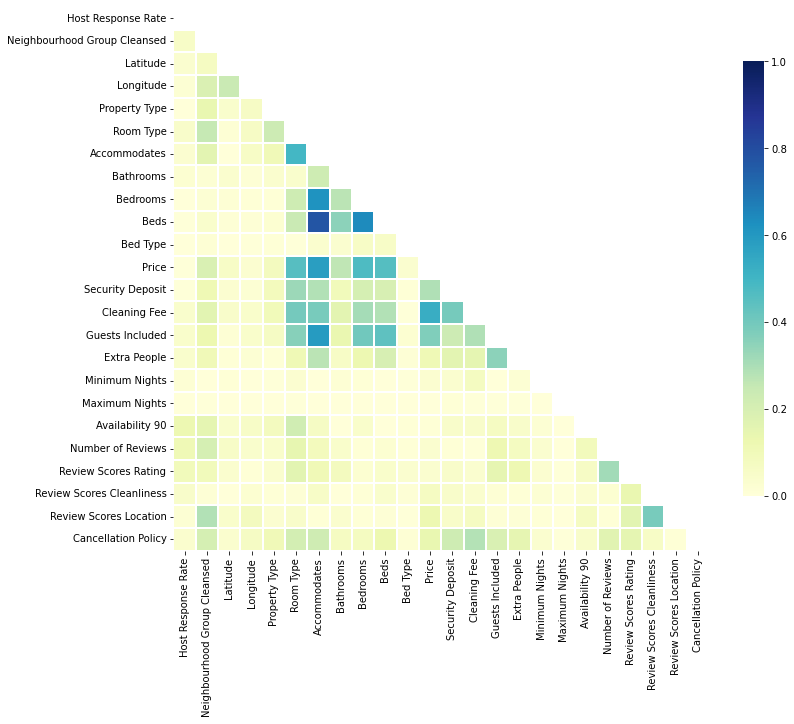

In [22]:
import seaborn as sns

corr = np.abs(df_train.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

<span style="color:#5D8BF4"> Del greafico de correlaciones podemos extraer las siguientes observaiones: </span>

- Las variables Beds y Accommodates parecen que tener una alta correlación (porsible colinealidad), por ahora decidimos no eliminar ninguna de ellas, dado que ambas tienen una buena correlación con la variables objetivo Price, la elminación de una u otra variable se realizará en base a un estudio más exaustiva;
- Dicidimos eliminar las variables Minimun Nights, Maximum Nights, Avialability 90, Number of Reviews al presentar éstas una muy baja correlacieon con la varaible objetivo;
- Ídem para la variable Bed Type;

<span style="color:#5D8BF4"> Eliminamos las variables </span>

In [23]:
df_train = df_train.drop(['Host Response Rate', 'Minimum Nights', 'Maximum Nights',
                          'Availability 90', 'Number of Reviews', 'Bed Type'], axis = 1)

In [24]:
df_train.shape

(10578, 18)

In [25]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Group Cleansed,10578.0,67.198477,1.368256,64.831253,65.885953,68.447026,68.447026,68.447026
Latitude,10578.0,40.420491,0.020225,40.331888,40.410028,40.418695,40.427852,40.514247
Longitude,10578.0,-3.696980,0.023514,-3.835498,-3.707711,-3.701479,-3.693732,-3.573613
Property Type,10578.0,66.627533,0.480977,65.248895,66.844090,66.844090,66.844090,66.844090
Room Type,10578.0,0.420968,0.523841,0.000000,0.000000,0.000000,1.000000,2.000000
Accommodates,10578.0,3.185101,1.989135,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10578.0,1.284364,0.800848,0.000000,1.000000,1.000000,1.000000,10.000000
Bedrooms,10578.0,1.311779,0.895069,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10578.0,2.010777,1.570467,1.000000,1.000000,2.000000,2.000000,16.000000
Price,10578.0,65.983456,56.389137,9.000000,30.000000,52.000000,80.000000,875.000000


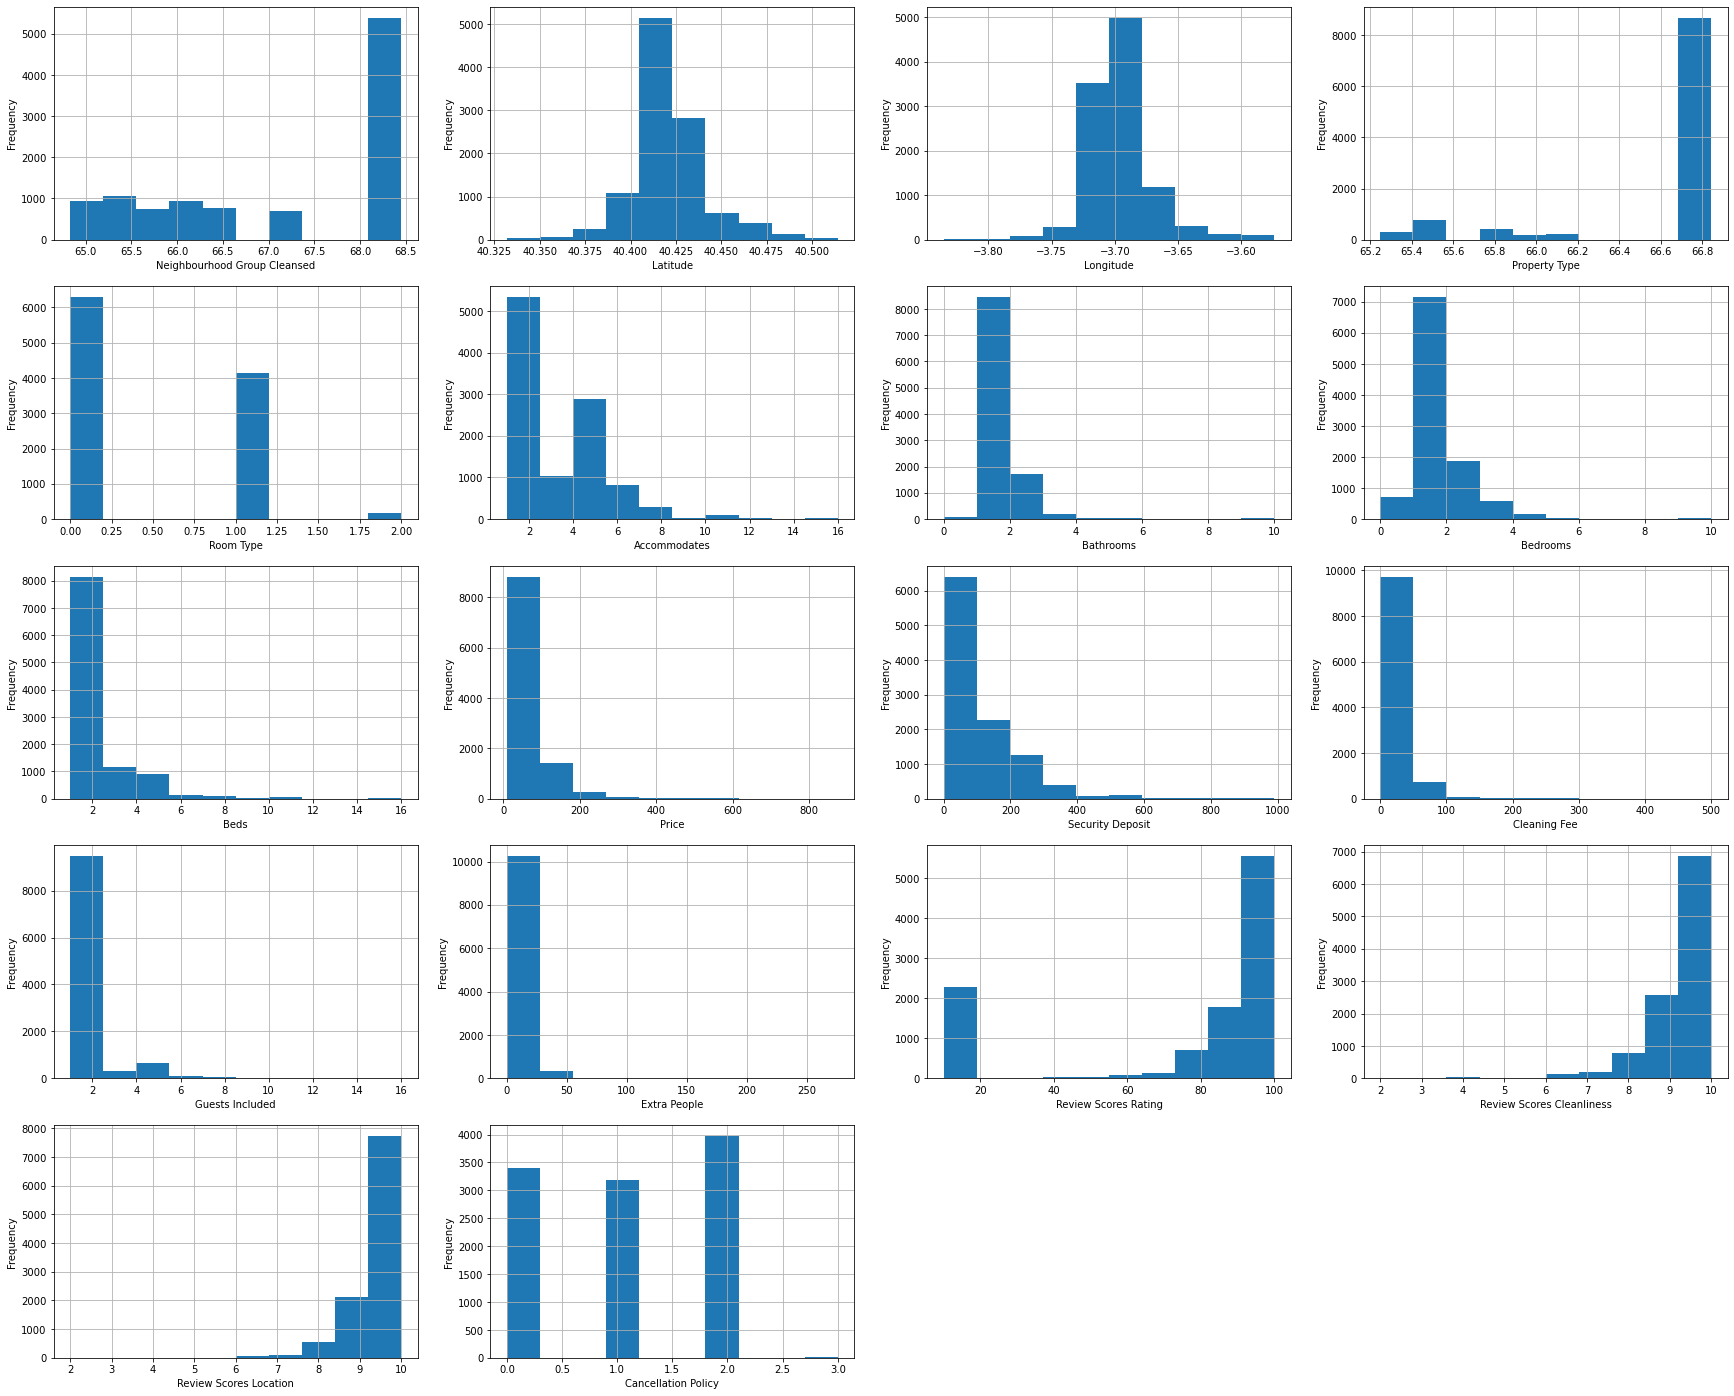

In [26]:
columns = df_train.columns
plt.figure(figsize=(30, 30))

for n, col in enumerate(columns):
    plt.subplot(6,4,n+1)
    df_train[col].plot.hist(grid = True)
    plt.axis()
    plt.xlabel(col)

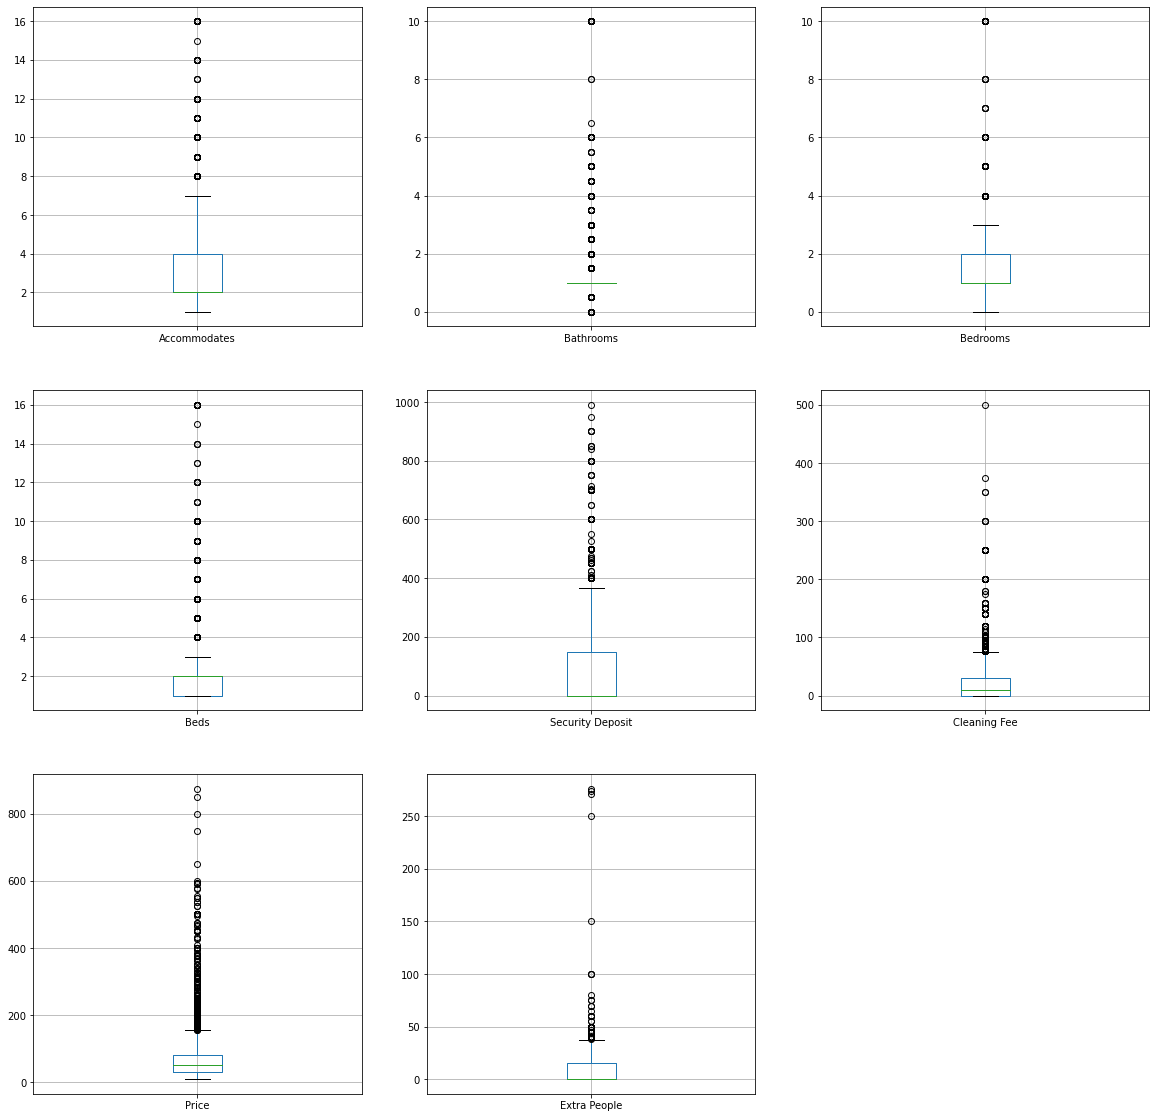

In [27]:
columns = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 
           'Cleaning Fee', 'Price', 'Extra People']

plt.figure(figsize=(20, 20))

for n, col in enumerate(columns):
    plt.subplot(3,3,n+1)
    df_train.boxplot(col)

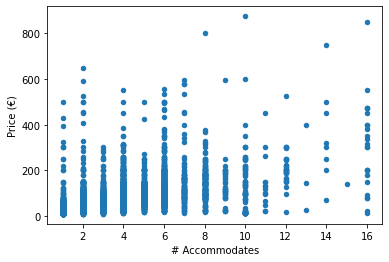

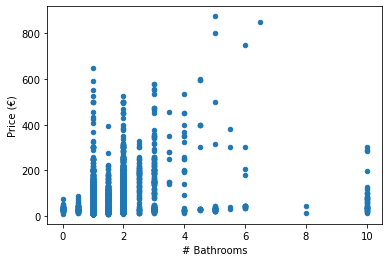

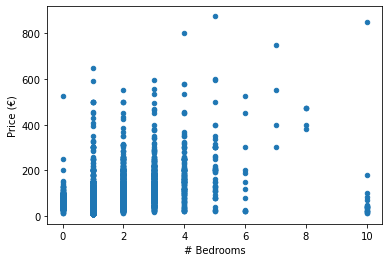

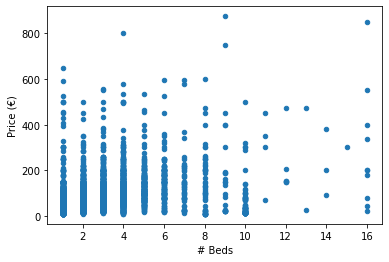

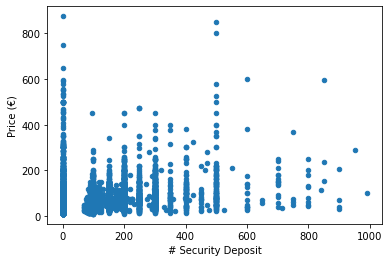

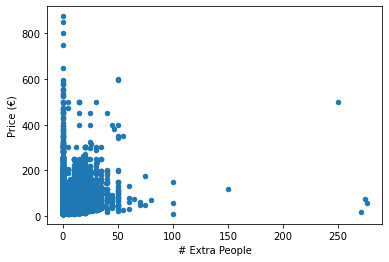

In [28]:
df_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('Price (€)')
plt.show()

df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price (€)')
plt.show()

df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

df_train.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')
plt.show()

df_train.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('# Security Deposit')
plt.ylabel('Price (€)')
plt.show()

df_train.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('Price (€)')
plt.show()

<span style="color:#5D8BF4"> De los gráficos extraemos las siguientes observaiones: </span>

- Debemos filtrar las variables Accommodates, Bathrooms, Bedrooms, Beds, Security Deposit, Cleaning Fee y Price;
- La variables objetivo Price así como a las variables escoradas hacía los extremos, sería necesario aplicar una transformacieon logarítmica para normalizar sus distribuciones. Se aplicará el logaritmo a las variables cuyo rango está dentro del rango logarítmico, esto es, valores postivisos distintos de 0;

<span style="color:#5D8BF4"> Eliminación de outliers y aplicamos transformaciones</span>

In [29]:
#df_train['Accommodates'].value_counts()

In [30]:
df_train = df_train[df_train['Accommodates'] <= 12]
df_train = df_train[df_train['Bathrooms'] <= 6]
df_train = df_train[df_train['Bedrooms'] <= 6]
df_train = df_train[df_train['Beds'] <= 10]
df_train = df_train[df_train['Extra People'] <= 50]
df_train = df_train[df_train['Security Deposit'] <= 600]
df_train = df_train[df_train['Price'] <= 600]

print(f'Porcentaje de muestras eliminadas: {round((10587-df_train.shape[0])/10587*100,4)} %')
print(f'Tamaño df_train: {df_train.shape}')

Porcentaje de muestras eliminadas: 1.653 %
Tamaño df_train: (10412, 18)


In [31]:
#transformación logarítmica de los datos
columns = ['Accommodates', 'Price']

for c in columns:
    df_train[f'{c}_log'] = df_train[c].apply(lambda x: np.log10(x))

#subsest eliminamos las dos columnas
df_train_log = df_train.drop(['Accommodates', 'Price'], axis = 1)
print(df_train.shape)
print(df_train_log.shape)

(10412, 20)
(10412, 18)


<span style="color:#5D8BF4">A partir de este momento usamos el subset de **df_train_log**</span>

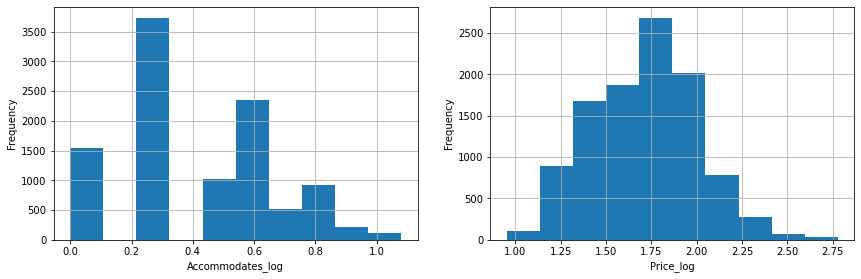

In [32]:
columns = ['Accommodates_log', 'Price_log']
plt.figure(figsize=(30, 30))

for n, col in enumerate(columns):
    plt.subplot(6,4,n+1)
    df_train_log[col].plot.hist(grid = True)
    plt.axis()
    plt.xlabel(col)

<span style="color:#5D8BF4">Movemos variable objetivo en primera posición.</span>

In [33]:
first_column = df_train_log.pop('Price_log')
df_train_log.insert(0, "Price_log", first_column)

df_train_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 10586
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price_log                     10412 non-null  float64
 1   Neighbourhood Group Cleansed  10412 non-null  float64
 2   Latitude                      10412 non-null  float64
 3   Longitude                     10412 non-null  float64
 4   Property Type                 10412 non-null  float64
 5   Room Type                     10412 non-null  int64  
 6   Bathrooms                     10412 non-null  float64
 7   Bedrooms                      10412 non-null  float64
 8   Beds                          10412 non-null  float64
 9   Security Deposit              10412 non-null  float64
 10  Cleaning Fee                  10412 non-null  float64
 11  Guests Included               10412 non-null  int64  
 12  Extra People                  10412 non-null  int64  
 13  R

<span style="color:#5D8BF4">**Filtrado y selección de varaibles**</span>

<span style="color:#5D8BF4">Vamos a pasar a ver algunos métodos y comprobar la posibilidad de reducir el número de variables predictoras, para mejorar la intepretabilidad del modelo a desarrollar. Es también probable que con un número alto de variables predictoras es más fácil que el; modelo incurra en overfitting.</span>

In [34]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_train_log.values 

y_train = data[:,0:1]    
X_train = data[:,1:]      

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

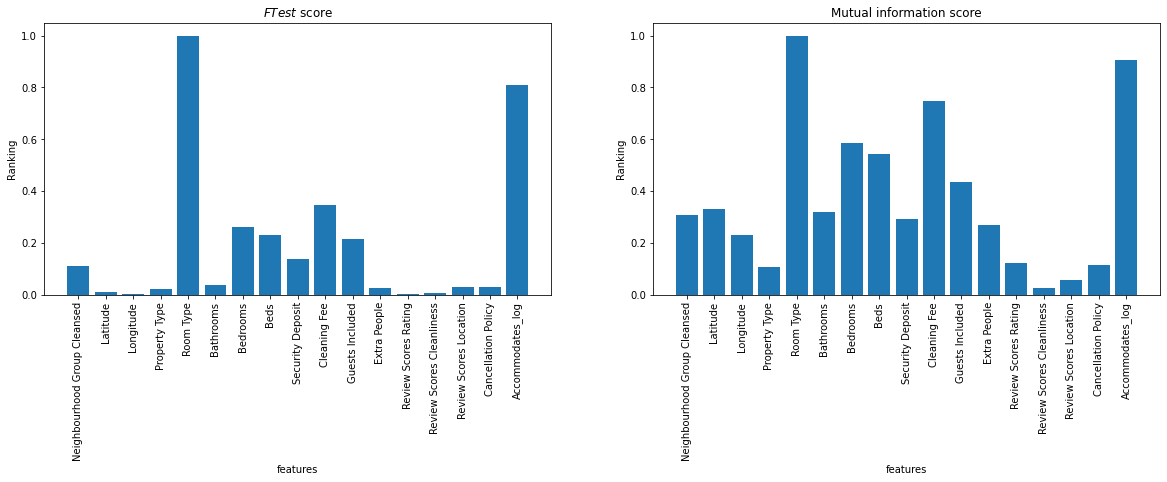

In [35]:
from sklearn.feature_selection import f_regression, mutual_info_regression

feature_names = df_train_log.columns[1:]

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<span style="color:#5D8BF4"> De los anteriores métodos aplicados lo que podemos extraer es que existen al menos 6 varibles con un peso significativamente importante frente al resto como son: Room Type, Accommodates, Bedroom, Beds, Cleaning Fee y Guests included. </span> 

<span style="color:#5D8BF4"> Vamos a aplicar a continuación *embedded method* con Lasso para ver si somos capace de desactivar algunas de las variables de menos peso.</span> 

best mean cross-validation score: -0.027
best parameters: {'alpha': 1e-10}


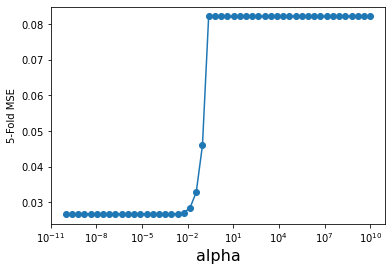

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha'] #10e-3 
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

#print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

mseTrainModelLassoTR = mean_squared_error(10**y_train,10**ytrainLasso) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado Modelo Lasso (train): %0.3g' % mseTrainModelLassoTR)
print('RMSE transformado Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLassoTR))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

Precio medio: 64.56 €
MSE transformado Modelo Lasso (train): 1.26e+03
RMSE transformado Modelo Lasso (train): 35.5
Neighbourhood Group Cleansed 0.0388521008231776
Latitude 0.0214281282297538
Longitude 0.0016496332297807528
Property Type -0.007571173788764816
Room Type -0.12134053403999655
Bathrooms 0.01825982784575092
Bedrooms 0.03685317314373754
Beds -0.00549763393598099
Security Deposit 0.008868884705181884
Cleaning Fee 0.042716679595618354
Guests Included 0.01274452084342739
Extra People -0.016966916964093175
Review Scores Rating -0.017979555320240703
Review Scores Cleanliness 0.018607798005765078
Review Scores Location 0.016128504283252996
Cancellation Policy -0.01450335831591731
Accommodates_log 0.07531011104849153


<span style="color:#5D8BF4"> **Obesraciones**: </span> 

- Con un RMSE de 35.50 y un precio medio 64.57 €, podemos decir que la regularización debe ser mejorada, dado que el margen de error bastante alto en comparación con el precio medio;
- Una clara observación y que ya anotamos durante el estudio de correlaciones es que las variables Accommodates y Beds presentaban una alta correlación, es probale que el valor negativo en el coeficiente de Beds se deba a un problema de colinialidad, por lo que decidimos eliminar Bed y quedarnos con la variable Accommodates;
- Variables como Longitude, Property Type, Beds, Guests Included y Extra People, tienen coeficientes relativamente bajos;
- De las variables con coeficiente negativo la que más llama la atención es la de Extra People, cuyo valor es negativo;

<span style="color:#5D8BF4"> **Decisión**: probamos en aumentar el valor de alpha para ver si algunos de los coeficinetes bajos tienden al 0. </span> 

In [38]:
from sklearn.metrics import mean_squared_error

alpha_optimo = 10e-3 
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

#print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

mseTrainModelLassoTR = mean_squared_error(10**y_train,10**ytrainLasso) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado Modelo Lasso (train): %0.3g' % mseTrainModelLassoTR)
print('RMSE transformado Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLassoTR))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

Precio medio: 64.56 €
MSE transformado Modelo Lasso (train): 1.35e+03
RMSE transformado Modelo Lasso (train): 36.8
Neighbourhood Group Cleansed 0.027147319127643278
Latitude 0.012277751885974904
Longitude 0.0
Property Type -0.0
Room Type -0.12003965767930426
Bathrooms 0.01135244199945814
Bedrooms 0.03545987445549702
Beds 0.0
Security Deposit 0.0010966218275703479
Cleaning Fee 0.03868526388976146
Guests Included 0.0005433416052802999
Extra People -0.0
Review Scores Rating -0.009589781236273461
Review Scores Cleanliness 0.011064950327472957
Review Scores Location 0.015094688260213748
Cancellation Policy -0.0
Accommodates_log 0.06463734481418405


<span style="color:#5D8BF4"> Vamos a usar Decision Tree para estudiar las variables de importancia y comprobar si es posible reducir la dimensionalidad, teneindo en cuenta los resultados obtenidos de Mutal info, Lasso y Decision Tree.</span> 

##  <span style="color:#5D8BF4"> Decision Tree Regressor <span>

<span style="color:#5D8BF4"> **Decisiones**: aun habiendo empeorado RMSE decidimos eliminar las varaibles con coeficiente 0, para mejorar la interpretabilidad.</span> 

best mean cross-validation score: 0.700
best parameters: {'max_depth': 7}


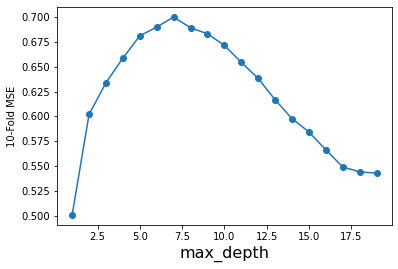

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 20)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

# probamos modelo con los valores óptimos

maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train)

print("R^2 Train: ",treeModel.score(XtrainScaled,y_train))

# mostramos métricas 

ytraingrid = grid.predict(XtrainScaled)
mseTrainModelGrid = mean_squared_error(y_train,ytraingrid)

mseTrainModelGrid = mean_squared_error(10**y_train,10**ytraingrid) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado DecisionTreeRegressore (train): %0.3g' % mseTrainModelGrid)
print('RMSE transformado DecisionTreeRegressor (train): %0.3g' % np.sqrt(mseTrainModelGrid))

R^2 Train:  0.7436685212135268
Precio medio: 64.56 €
MSE transformado DecisionTreeRegressore (train): 935
RMSE transformado DecisionTreeRegressor (train): 30.6


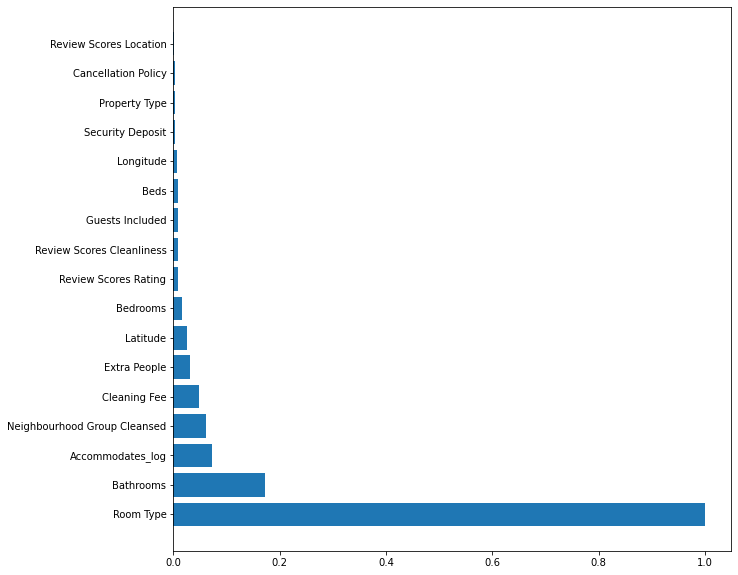

In [41]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

feature_names = df_train_log.columns[1:]

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

<span style="color:#5D8BF4"> Tras el análisis de los tres métodos para reducir la dimensionalidad tomamos la decisión de eliminar tres varaibles:</span> 
- Longitude;
- Property Type;
- Cancellation Policy;

In [42]:
df_train_log_copy = df_train_log
df_train_log_filtered = df_train_log.drop(['Longitude', 'Property Type', 'Beds', 
                                           'Cancellation Policy', 'Security Deposit'] , axis = 1)

In [43]:
df_train_log_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 10586
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price_log                     10412 non-null  float64
 1   Neighbourhood Group Cleansed  10412 non-null  float64
 2   Latitude                      10412 non-null  float64
 3   Room Type                     10412 non-null  int64  
 4   Bathrooms                     10412 non-null  float64
 5   Bedrooms                      10412 non-null  float64
 6   Cleaning Fee                  10412 non-null  float64
 7   Guests Included               10412 non-null  int64  
 8   Extra People                  10412 non-null  int64  
 9   Review Scores Rating          10412 non-null  float64
 10  Review Scores Cleanliness     10412 non-null  float64
 11  Review Scores Location        10412 non-null  float64
 12  Accommodates_log              10412 non-null  float64
dtypes

<span style="color:#5D8BF4"> Volvemos a entrenar el modelo con los datos filtrados. Probaremos también Random Forest como seleccieon de variables importante.</span> 

In [44]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_train_log_filtered.values

y_train = data[:,0:1]     
X_train = data[:,1:]      

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: 0.700
best parameters: {'max_depth': 7}


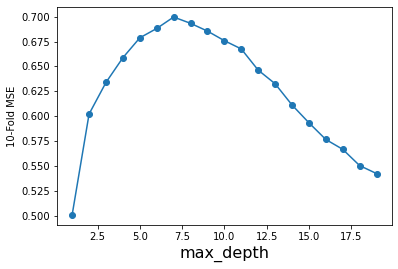

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 20)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

# probamos modelo con los valores óptimos

maxDepthOptimo = grid.best_params_['max_depth']
treeModel_1 = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train)

print("R^2 Train: ",treeModel_1.score(XtrainScaled,y_train))

# mostramos métricas 

ytraingrid_1 = grid.predict(XtrainScaled)
mseTrainModelGrid_1 = mean_squared_error(y_train,ytraingrid)

mseTrainModelGrid_1 = mean_squared_error(10**y_train,10**ytraingrid) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado DecisionTreeRegressore (train): %0.3g' % mseTrainModelGrid_1)
print('RMSE transformado DecisionTreeRegressor (train): %0.3g' % np.sqrt(mseTrainModelGrid_1))

R^2 Train:  0.7422399518010714
Precio medio: 64.56 €
MSE transformado DecisionTreeRegressore (train): 935
RMSE transformado DecisionTreeRegressor (train): 30.6


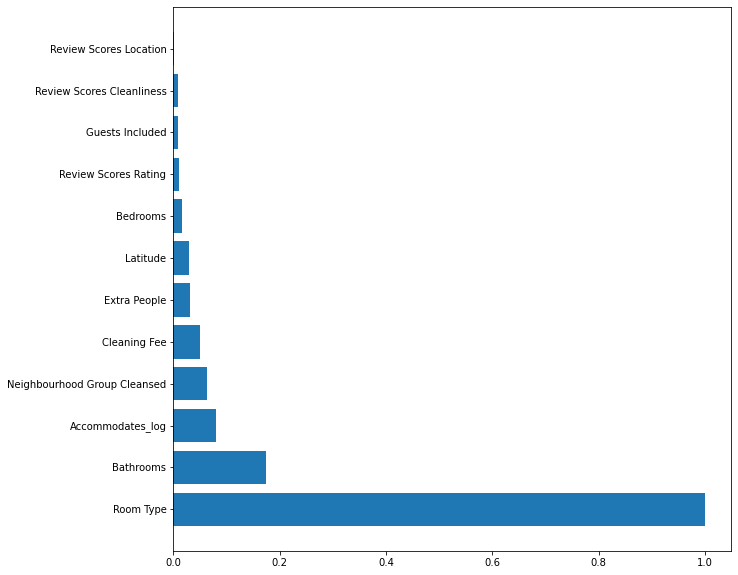

In [47]:
importances = treeModel_1.feature_importances_
importances = importances / np.max(importances)

feature_names = df_train_log_filtered.columns[1:]

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

In [48]:
#from sklearn.tree import plot_tree

# output size of decision tree
#plt.figure(figsize=(300,100))

#plot_tree(treeModel, filled=True)
#plt.title("Decision tree training for training dataset")
#plt.show()

<span style="color:#5D8BF4"> Veamos si Random Forest puede ayiudarnos a la selección de varaibles más importantes, al comparar con Decision Tree.</span> 

##  <span style="color:#5D8BF4"> Random Forest Regressor  <span>

In [49]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000, 1500]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0, max_features='sqrt'), 
                    param_grid=tuned_parameters, cv=5, verbose = 2) 

grid_rf.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_rf.best_score_))
print("best parameters: {}".format(grid_rf.best_params_))

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=500; total time=   0.7s
[CV] END ......................max_depth=1, n_e

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=500; total time=   1.2s
[CV] END ...................

[CV] END ......................max_depth=9, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=9, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=9, n_estimators=500; total time=   1.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   1.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   1.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   1.8s
[CV] END ......................max_depth=9, n_estimators=500; total time=   1.8s
[CV] END ...................

[CV] END .....................max_depth=13, n_estimators=200; total time=   1.0s
[CV] END .....................max_depth=13, n_estimators=200; total time=   1.0s
[CV] END .....................max_depth=13, n_estimators=200; total time=   1.0s
[CV] END .....................max_depth=13, n_estimators=200; total time=   1.0s
[CV] END .....................max_depth=13, n_estimators=200; total time=   1.0s
[CV] END .....................max_depth=13, n_estimators=500; total time=   2.5s
[CV] END .....................max_depth=13, n_estimators=500; total time=   2.5s
[CV] END .....................max_depth=13, n_estimators=500; total time=   2.5s
[CV] END .....................max_depth=13, n_estimators=500; total time=   2.5s
[CV] END .....................max_depth=13, n_estimators=500; total time=   2.5s
[CV] END ....................max_depth=13, n_estimators=1000; total time=   5.1s
[CV] END ....................max_depth=13, n_estimators=1000; total time=   5.0s
[CV] END ...................

[CV] END .....................max_depth=17, n_estimators=200; total time=   1.3s
[CV] END .....................max_depth=17, n_estimators=200; total time=   1.3s
[CV] END .....................max_depth=17, n_estimators=200; total time=   1.3s
[CV] END .....................max_depth=17, n_estimators=500; total time=   3.2s
[CV] END .....................max_depth=17, n_estimators=500; total time=   3.2s
[CV] END .....................max_depth=17, n_estimators=500; total time=   3.2s
[CV] END .....................max_depth=17, n_estimators=500; total time=   3.2s
[CV] END .....................max_depth=17, n_estimators=500; total time=   3.2s
[CV] END ....................max_depth=17, n_estimators=1000; total time=   6.4s
[CV] END ....................max_depth=17, n_estimators=1000; total time=   6.3s
[CV] END ....................max_depth=17, n_estimators=1000; total time=   6.4s
[CV] END ....................max_depth=17, n_estimators=1000; total time=   6.4s
[CV] END ...................

In [50]:
from sklearn.metrics import mean_squared_error

# probamos modelo con los valores óptimos

maxDepthOptimo = grid_rf.best_params_['max_depth']
neOptimo = grid_rf.best_params_['n_estimators']
rf = RandomForestRegressor(max_depth=maxDepthOptimo, n_estimators = neOptimo).fit(XtrainScaled,y_train)

print("R^2 Train: ",rf.score(XtrainScaled,y_train))

# mostramos métricas 

ytraingrid = rf.predict(XtrainScaled)
mseTrainModelGrid = mean_squared_error(y_train,ytraingrid)

mseTrainModelGrid = mean_squared_error(10**y_train,10**ytraingrid) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado RandomForest (train): %0.3g' % mseTrainModelGrid)
print('RMSE transformado RandomForest (train): %0.3g' % np.sqrt(mseTrainModelGrid))

R^2 Train:  0.9084411560359325
Precio medio: 64.56 €
MSE transformado RandomForest (train): 412
RMSE transformado RandomForest (train): 20.3


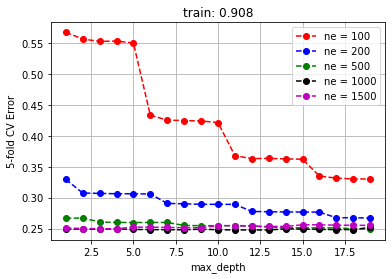

In [51]:
maxDepth = range(1,20)
num_e = [100, 200, 500, 1000, 1500]

error = 1-grid_rf.cv_results_['mean_test_score'].reshape(len(num_e),len(maxDepth))
colors = ['r','b','g','k','m']
for i,ne in enumerate(num_e):    
    plt.plot(maxDepth,error[i,:],colors[i] + '--o',label='ne = %g'%ne)

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f'%(rf.score(XtrainScaled,y_train)))
plt.grid()
plt.show()

# \ntest:  %0.3f     ,rf_1.score(XtestScaled,y_test         (inluir en plt.title)

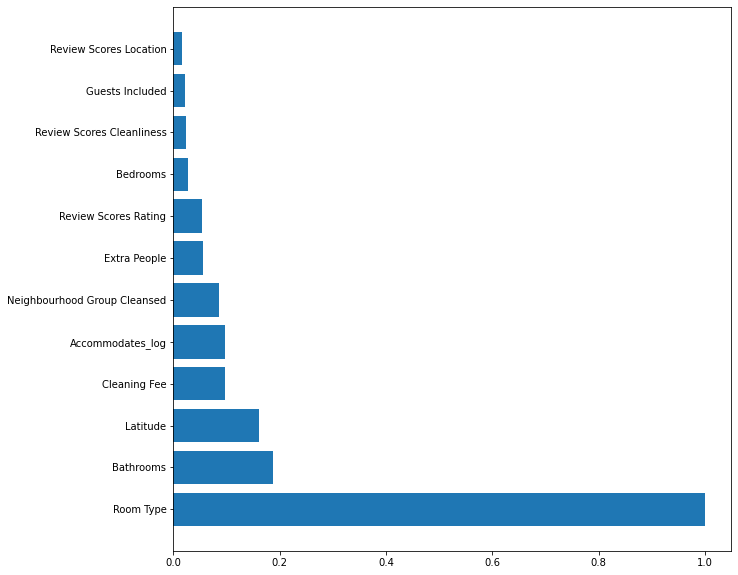

In [52]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

feature_names = df_train_log_filtered.columns[1:]

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

<span style="color:#5D8BF4"> El modelo con mejores prestaciones es **Random Forest con un R^2 de 0.90 y un RMSE de 20.4**. Es decir, el modelo explica el 90% de la varianza de las muestras y tiene un error medio en la predicciones de 20.4 € <span>
        
<span style="color:#5D8BF4"> Obeservaiones: <span>
- eliminaremos la variable Review Scores Location, poco importancia en ambos modelos;
- del gráfico de Random Fores pordemos inciur que habrá overfiting entre modelo de train y test, podemos reducir la profundida de los árboles dado que para el número de estimaciones de 500 y 1000 hay bastante similitud en cuanto al error, por lo que podemos reducir la complejidad del modelo para bajar el sposible overfitting si lo tuviéramos;

In [53]:
df_train_log_filt = df_train_log_filtered.drop(['Review Scores Location'] , axis = 1)
df_train_log_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 10586
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price_log                     10412 non-null  float64
 1   Neighbourhood Group Cleansed  10412 non-null  float64
 2   Latitude                      10412 non-null  float64
 3   Room Type                     10412 non-null  int64  
 4   Bathrooms                     10412 non-null  float64
 5   Bedrooms                      10412 non-null  float64
 6   Cleaning Fee                  10412 non-null  float64
 7   Guests Included               10412 non-null  int64  
 8   Extra People                  10412 non-null  int64  
 9   Review Scores Rating          10412 non-null  float64
 10  Review Scores Cleanliness     10412 non-null  float64
 11  Accommodates_log              10412 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.0 MB


In [54]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_train_log_filt.values 

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [55]:
from sklearn.metrics import mean_squared_error

# probamos modelo con los valores óptimos

maxDepthOptimo = grid_rf.best_params_['max_depth']
neOptimo = grid_rf.best_params_['n_estimators']
rf = RandomForestRegressor(max_depth=maxDepthOptimo, n_estimators = neOptimo).fit(XtrainScaled,y_train)

print("R^2 Train: ",rf.score(XtrainScaled,y_train))

# mostramos métricas 

ytraingrid = rf.predict(XtrainScaled)
mseTrainModelGrid = mean_squared_error(y_train,ytraingrid)

mseTrainModelGrid = mean_squared_error(10**y_train,10**ytraingrid) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')
print('MSE transformado RandomForest (train): %0.3g' % mseTrainModelGrid)
print('RMSE transformado RandomForest (train): %0.3g' % np.sqrt(mseTrainModelGrid))

R^2 Train:  0.9088217994259894
Precio medio: 64.56 €
MSE transformado RandomForest (train): 409
RMSE transformado RandomForest (train): 20.2


<span style="color:#5D8BF4"> Aun habiendo empeorado algo las prestaciones, 0.001 en R^2 y reducido 0.1 en RSME, el modelo tiene una mejor intepretabilidad.<span>
    
<span style="color:#5D8BF4"> **Preparación de los datos de TEST**<span>

In [56]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')
df_test.shape

(2647, 40)

In [57]:
# eliminamos todas las variables expecto las que usamos en el modelo

df_test = df_test.drop(['Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Neighbourhood',
                        'Neighbourhood Cleansed', 'Longitude', 'Property Type', 'Beds', 'Bed Type', 
                        'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 
                        'Minimum Nights', 'Maximum Nights', 'Has Availability', 'Availability 30', 
                        'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews',
                        'Review Scores Accuracy', 'Review Scores Checkin', 
                        'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
                        'Cancellation Policy', 'Reviews per Month'], axis = 1)

# eliminamos 9 muestras con Price NaN

df_test = df_test.dropna(subset=['Price'])

df_test.shape

(2647, 12)

In [58]:
df_test.head()

,Neighbourhood Group Cleansed,Latitude,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Cleaning Fee,Guests Included,Extra People,Review Scores Rating,Review Scores Cleanliness
0,Centro,40.424287,Entire home/apt,4,1.0,2.0,100.0,NaN,1,0,NaN,NaN
1,Centro,40.415777,Private room,2,1.0,1.0,50.0,10.0,1,0,95.0,10.0
2,Centro,40.415150,Entire home/apt,2,1.0,1.0,64.0,NaN,1,0,96.0,10.0
3,Centro,40.408956,Private room,1,1.0,1.0,19.0,NaN,1,0,89.0,9.0
4,Centro,40.420115,Entire home/apt,5,3.0,2.0,250.0,NaN,1,0,100.0,10.0


In [59]:
from sklearn.preprocessing import LabelEncoder

# codificación de la variables
df_test['Neighbourhood Group Cleansed'] = calc_smooth_mean(df_test, by='Neighbourhood Group Cleansed', on='Price', m=df_test.shape[0])
df_test['Room Type'] = le_room_type.transform(df_test['Room Type'])

# imputación de valores ausentes

from sklearn.impute import SimpleImputer

#df_test = df_test.copy()
#df_test[['Bathrooms', 'Review Scores Rating']] = imputer_mf.transform(df_test[['Bathrooms','Review Scores Rating']])
df_test[['Bathrooms']] = imputer_mf_1.transform(df_test[['Bathrooms']])
df_test[['Bedrooms']] = imputer_mf_2.transform(df_test[['Bedrooms']])
df_test[['Review Scores Rating']] = imputer_mf_4.transform(df_test[['Review Scores Rating']])
df_test[['Review Scores Cleanliness']] = imputer_mf_5.transform(df_test[['Review Scores Cleanliness']])

df_test['Cleaning Fee'] = df_test['Cleaning Fee'].fillna(0)

# eliminacieon de outliers

df_test = df_test[df_test['Accommodates'] <= 12]
df_test = df_test[df_test['Bathrooms'] <= 6]
df_test = df_test[df_test['Bedrooms'] <= 6]
df_test = df_test[df_test['Extra People'] <= 50]
df_test = df_test[df_test['Price'] <= 600]

# transformación logarítmica de los datos

columns = ['Accommodates', 'Price']
for c in columns:
    df_test[f'{c}_log'] = df_test[c].apply(lambda x: np.log10(x))

# subsest eliminamos las dos columnas

df_test_log = df_test.drop(['Accommodates', 'Price'], axis = 1)

# movemos la variable objetico Price en primer lugar

first_column = df_test_log.pop('Price_log')
df_test_log.insert(0, "Price_log", first_column)

df_test_log.head()

,Price_log,Neighbourhood Group Cleansed,Latitude,Room Type,Bathrooms,Bedrooms,Cleaning Fee,Guests Included,Extra People,Review Scores Rating,Review Scores Cleanliness,Accommodates_log
0,2.000000,66.632635,40.424287,0,1.0,2.0,0.0,1,0,10.0,10.0,0.60206
1,1.698970,66.632635,40.415777,1,1.0,1.0,10.0,1,0,95.0,10.0,0.30103
2,1.806180,66.632635,40.415150,0,1.0,1.0,0.0,1,0,96.0,10.0,0.30103
3,1.278754,66.632635,40.408956,1,1.0,1.0,0.0,1,0,89.0,9.0,0.00000
4,2.397940,66.632635,40.420115,0,3.0,2.0,0.0,1,0,100.0,10.0,0.69897


In [60]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_test_log.values 

y_test = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data[:,1:]      # nos quedamos con el resto

XtestScaled = scaler.transform(X_test)

<span style="color:#5D8BF4"> **Random Forest** --> TRAIN - TEST<span>

In [61]:
from sklearn.metrics import mean_squared_error

# OJO prueba con valores óptimos
# maxDepthOptimo = 14
# neOptimo = 1000

#maxDepthOptimo = grid_rf.best_params_['max_depth']
#neOptimo = grid_rf.best_params_['n_estimators']
#rf = RandomForestRegressor(max_depth=maxDepthOptimo, n_estimators = neOptimo).fit(XtrainScaled,y_train)

# mostramos métricas 

ytestgrid_2 = rf.predict(XtestScaled)
mseTestModelGrid_2 = mean_squared_error(y_test,ytestgrid_2)

mseTestModelGrid_2 = mean_squared_error(10**y_test,10**ytestgrid_2) 

print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')

# TRAIN
print("R^2 Train: ",rf.score(XtrainScaled,y_train))
print('MSE transformado RandomForest (train): %0.3g' % mseTrainModelGrid)
print('RMSE transformado RandomForest (train): %0.3g' % np.sqrt(mseTrainModelGrid))

# TEST
print("R^2 Test: ",rf.score(XtestScaled,y_test))
print('MSE transformado RandomForest (test): %0.3g' % mseTestModelGrid_2)
print('RMSE transformado RandomForest (test): %0.3g' % np.sqrt(mseTestModelGrid_2))

Precio medio: 64.56 €
R^2 Train:  0.9088217994259894
MSE transformado RandomForest (train): 409
RMSE transformado RandomForest (train): 20.2
R^2 Test:  0.6894822245081993
MSE transformado RandomForest (test): 1.01e+03
RMSE transformado RandomForest (test): 31.7


<span style="color:#5D8BF4"> Podemos comprobar que nuestro modelo presenta overfitting, esto es un buen rendimiento en train, pero en test los resultados empeoran considerablemente. Podemos seguir reduciendo la dimensionalidad y probar con otro modelo para ver si es posible eliminar alguna varaibles de poca importancia.<span>
    
<span style="color:#5D8BF4"> Optamos por tomar las siguientes decisiones: <span>
- reducir la complejidad del modelo bajando los valores de max_depth y ne_estimators;    
- probar con un modelo K-NN Regressor y/o SVM;
- existe la posibilidad de reducir la varainza de nuestra muestra con métodos boostrap/bagging (Bootstrap Aggregation), pero cláramente en nuestros datos exiten varios predicadores fuertes, al menos uno de ellos, lo que puede ocasionar que los árboles generados sean bastante similares entre así. Por lo que descartamos esa opción;


### <span style="color:#5D8BF4"> Random Forest - reduciendo complejidad <span>

In [62]:
from sklearn.metrics import mean_squared_error

maxDepthOptimo = 8 #grid_rf.best_params_['max_depth']
neOptimo = 1000 #grid_rf.best_params_['n_estimators']
rf_2 = RandomForestRegressor(max_depth=maxDepthOptimo, n_estimators = neOptimo).fit(XtrainScaled,y_train)

# mostramos métricas 

# TRAIN
ytestgrid_train = rf_2.predict(XtrainScaled)
mseTestModelGrid_train = mean_squared_error(y_train,ytestgrid_train)
mseTestModelGrid_train = mean_squared_error(10**y_train,10**ytestgrid_train) 

ytestgrid_test = rf_2.predict(XtestScaled)
mseTestModelGrid_test = mean_squared_error(y_test,ytestgrid_test)
mseTestModelGrid_test = mean_squared_error(10**y_test,10**ytestgrid_test)

# Precio medio comparar RMSE
print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')

# TRAIN
print("R^2 Train: ",rf_2.score(XtrainScaled,y_train))
print('MSE transformado RandomForest (train): %0.3g' % mseTestModelGrid_train)
print('RMSE transformado RandomForest (train): %0.3g' % np.sqrt(mseTestModelGrid_train))

# TEST
print("R^2 Test: ",rf_2.score(XtestScaled,y_test))
print('MSE transformado RandomForest (test): %0.3g' % mseTestModelGrid_test)
print('RMSE transformado RandomForest (test): %0.3g' % np.sqrt(mseTestModelGrid_test))

Precio medio: 64.56 €
R^2 Train:  0.7817323180977157
MSE transformado RandomForest (train): 841
RMSE transformado RandomForest (train): 29
R^2 Test:  0.6892209275324187
MSE transformado RandomForest (test): 1.05e+03
RMSE transformado RandomForest (test): 32.4


<span style="color:#5D8BF4">**Observaciones**: guiándonos por los resultados de la gráfica de estimación de máxima profundidad y ne_estimators obtenemos que **reduciendo el valor de max_depth óptimo** mejoramos el comportamientio comparativo entre train y test. El modelo penaliza la reducción de la profundida incrementado los valores de RMSE, pero podemos dar por coherente dichos resultados y aceptar los márgenes de error.<span>

##  <span style="color:#5D8BF4"> K-NN Regressor <span>

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................

[CV] END .....................................n_neighbors=21; total time=   0.2s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.2s
[CV] END .....................................n_neighbors=21; total time=   0.2s
[CV] END .....................................n_neighbors=22; total time=   0.2s
[CV] END .....................................n_neighbors=22; total time=   0.2s
[CV] END .....................................n_neighbors=22; total time=   0.2s
[CV] END .....................................n_neighbors=22; total time=   0.2s
[CV] END .....................................n_neighbors=22; total time=   0.2s
[CV] END .....................................n_neighbors=23; total time=   0.2s
[CV] END .....................................n_neighbors=23; total time=   0.2s
[CV] END .....................................n_neighbors=23; total time=   0.2s
[CV] END ...................

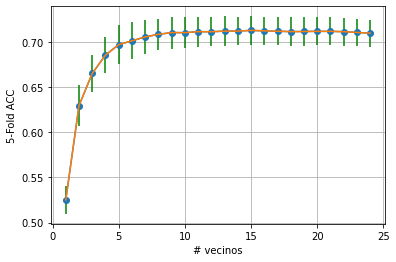

acc (test): 0.75


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# selección de número de vecinos
param_grid = {'n_neighbors':  np.arange(1, 25, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv = 5, verbose = 2)
grid_knn.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

nVecinos = range(1,25)

# representación
scores = np.array(grid_knn.cv_results_['mean_test_score'])
stdvalues = np.array(grid_knn.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid_knn.score(XtrainScaled, y_train)))

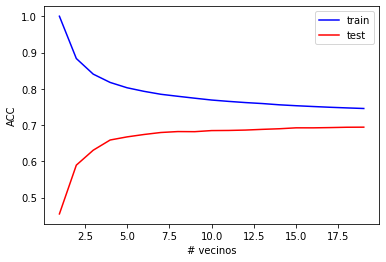

In [64]:
neighbors = range(1,20)
acc_train = []
acc_test  = []

for n in neighbors:
    
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(XtrainScaled, y_train)
    
    acc_train.append(knn.score(XtrainScaled, y_train))
    acc_test.append(knn.score(XtestScaled, y_test))
    

plt.plot(neighbors,acc_train,'b',label='train')
plt.plot(neighbors,acc_test,'r',label='test')
plt.legend()
plt.xlabel('# vecinos')
plt.ylabel('ACC')
plt.show()

In [65]:
grid_knn_1 = KNeighborsRegressor(n_neighbors = 15)
grid_knn_1.fit(XtrainScaled, y_train)

# mostramos métricas 

# TRAIN
ytestgrid_train = grid_knn_1.predict(XtrainScaled)
mseTestModelGrid_train = mean_squared_error(y_train,ytestgrid_train)
mseTestModelGrid_train = mean_squared_error(10**y_train,10**ytestgrid_train) 

ytestgrid_test = grid_knn_1.predict(XtestScaled)
mseTestModelGrid_test = mean_squared_error(y_test,ytestgrid_test)
mseTestModelGrid_test = mean_squared_error(10**y_test,10**ytestgrid_test)

# Precio medio comparar RMSE
print(f'Precio medio: {round(df_train["Price"].mean(), 2)} €')

# TRAIN
print("R^2 Train: ",grid_knn_1.score(XtrainScaled,y_train))
print('MSE transformado RandomForest (train): %0.3g' % mseTestModelGrid_train)
print('RMSE transformado RandomForest (train): %0.3g' % np.sqrt(mseTestModelGrid_train))

# TEST
print("R^2 Test: ",grid_knn_1.score(XtestScaled,y_test))
print('MSE transformado RandomForest (test): %0.3g' % mseTestModelGrid_test)
print('RMSE transformado RandomForest (test): %0.3g' % np.sqrt(mseTestModelGrid_test))


Precio medio: 64.56 €
R^2 Train:  0.7533645657855303
MSE transformado RandomForest (train): 1e+03
RMSE transformado RandomForest (train): 31.7
R^2 Test:  0.6924260708014868
MSE transformado RandomForest (test): 1.12e+03
RMSE transformado RandomForest (test): 33.4


<span style="color:#5D8BF4">**Observaciones**: los resultados obtenidos con K-NN Regressor son ligeramente mejores que los obtenidos con Frandom Forest. Ha mejorado R^2 es test, haciendo que el modelo generalice un poco mejor. RSME ha empeorado, pero si comparamos los datos de RMSEtrain y RMSEtest vemos que la diferencia de error en la predicíon entre train y test es más baja con el modelo de vecinos más cercanos.<span>

### <span style="color:#5D8BF4">Conclusiones:<span>
    
- Con el modelo K-NN Regressor hemos conseguido reducir el sobreajuste/ overfitting del modelo, mejorando su generalización pudiendo explicar el 69.2% de la varianza de la muestra;
- A vistas de una elegir un modelo el modelo de Random Forest proporciona una mejor interpretabilidad aunque sus métricas sean ligeramente inferiores al de K-NN Regressor; 

### <span style="color:#5D8BF4">Mejoras:<span> 

- Estudiar en profundidas algunas varaibles como Review Scores Cleanliness y Guests Included, existe la posibilidad de generar nuevas varaibles relacionadas con la variable objetivo Price que favorezcan la predición e intepretabilidad;
- Durante la fase de imputación de valores ausentes se puede plantear una imputación con k-nn Neighbourhood, para los valores ausentes de las variables Review;
- Durante el mismo proceso de beden estudiar en profundidad las varaibles Cleaning Fee y Security Deposit, variables que se han tenido en cuanta para el modelo y fueron imputados a 0. Posiblmenete la predicción mejore si se plantea el desarrollo de un modelo de regresión para su imputación;